In [1]:
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
block_path = '/home/AD/tsheehan/data/Pen01_Lft_AP750_ML1750__Site01_Z1100__B952_cat_P01_S01_1'
from ephys import core
from ephys import clust
from ephys import events
from ephys import rasters
import os
import scipy as sp
import scipy.io.wavfile as wf
import scipy.signal as signal

In [2]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# Load events, spikes, and good quality unit index

In [3]:
# want to get STA and STC for example dataset
# load response (neurons), stimulus (wav files to spectrograms)
clusters = core.load_clusters(block_path) # pandas - DataFrame
neurons = (
    clusters[clusters.quality.isin(['Good'])]
    .sort_values(['quality','cluster'],ascending=False)
    .reset_index()
)
trials = events.load_trials(block_path)
stim_labels = list(set(trials.stimulus))
spikes = core.load_spikes(block_path)

# Load Songs and compute spectrograms

In [4]:
fs = 44100
stim_labels[0]
stim_loc = block_path + '/stims'
files = os.listdir(stim_loc)
songs = []
spects = []
freqs = []
times = []
noverlap = 512
nperseg = 1024

for i in range(len(stim_labels)):
    this_label = stim_labels[i] +'.wav'
    my_song = [x for x in files if x in this_label]
    if my_song:
        this_song = wf.read(stim_loc + '/' + my_song[0])
        songs.append((this_song[1]))    
    
    my_spect = signal.spectrogram(songs[i],fs =fs, nperseg = nperseg,noverlap = noverlap)
    spects.append(my_spect[2])
    freqs.append(my_spect[0])
    times.append(my_spect[1])

In [6]:
import get_STA
reload(get_STA)
stim_use = 2
neuron_ind = 12
this_label = stim_labels[stim_use]
these_trials = trials[trials['stimulus']==this_label]
this_st = these_trials['time_samples'].values
this_end = these_trials['stimulus_end'].values
dd = this_end-this_st

my_cluster = neurons['cluster'][neuron_ind]
my_spikes = spikes[spikes['cluster']==my_cluster]
my_times = my_spikes['time_samples']

#get_STA_p.get_STA_from_points(my_times,this_end,dd[0],songs[stim_use],50)
#tmp  = get_STA_p.get_STA_mult_song(my_times,songs,trials)
#get_STA_p.plot_STA_mult_song(my_times,songs,trials,[],1)

#get_STA_p.plot_STA_mult_neuron(neurons,spikes,songs,trials,40)
s_view = 2
c_lim = (-60,60)
#get_STA_p.visualize_reduced_spectrogram(songs[s_view],c_lim)
#get_STA_p.visualize_full_spectrogram(songs[s_view],c_lim)
ratio = get_STA.get_ds_rate(songs)
spk_times = my_spikes['time_samples'].values


(2892045, 3227, 896)
(2961304, 3304, 896)
(2674358, 2984, 896)
(2400000, 2678, 896)
(2400000, 2678, 896)


(30472, 16, 20)


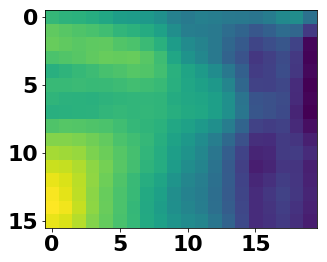

In [148]:
import get_STA
reload(get_STA)
song_names = list(set(trials['stimulus']))
song_mask, song_ramp = get_STA.get_song_mask(trials,ratio/2)


STA,f = get_STA.get_sta(spk_times,songs,song_mask,song_ramp,20)
mSTA = np.mean(STA,0)
plt.imshow(mSTA)
print(np.shape(STA))
#STA[1]
#ind = 1000
#print(np.shape(STA[ind]),STA[ind])
# STA

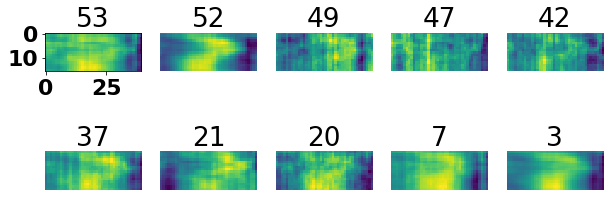

In [107]:
import get_STA
reload(get_STA)
get_STA.visualize_some_stas(neurons,spikes,songs,song_mask,song_ramp,40)


In [129]:
# play around with stimulus covariance 
#f,t0,spect0 = get_STA.reduced_spectrogram(songs[0])
#f,t1,spect1 = get_STA.reduced_spectrogram(songs[1])
import get_STA
reload(get_STA)
flat_spect0 = get_STA.flat_reduced_spectrogram(songs[0],20)
flat_spect1 = get_STA.flat_reduced_spectrogram(songs[1],20)
# really need to get all spectrograms and subract mean stimulus
t_0 = np.shape(flat_spect0)[1]
cov0 = np.matmul(flat_spect0,np.transpose(flat_spect0))/t_0
tmp = np.cov(flat_spect0)
#print(np.shape(flat_spect0))
print(np.shape(spect0),np.shape(spect1))

((16, 3227), (16, 3304))


In [139]:
# np.shape(cov0)
# np.shape(flat_sect0)
import get_STA
reload(get_STA)
stack_out = get_STA.flat_reduced_spectrograms_ms(songs,20)
my_cov = np.cov(stack_out)
t_0 = np.shape(stack_out)[1]

my_cov_try = np.matmul(stack_out,np.transpose(stack_out))/t_0

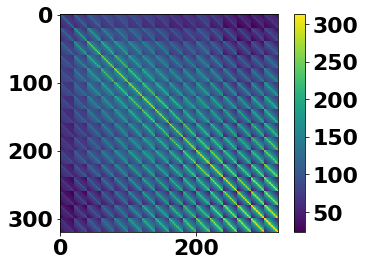

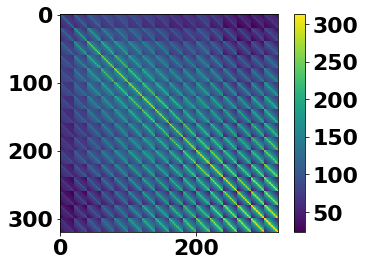

In [143]:
plt.imshow(my_cov)
plt.colorbar()
plt.show()
plt.imshow(my_cov_try)
plt.colorbar()
plt.show()

In [5]:
mSTA_ur = mSTA.ravel() 
from numpy.linalg import inv
my_cov_inv = inv(my_cov)
#print(np.shape(my_cov_inv),np.shape(mSTA_ur))
mSTA_dcor = np.matmul(my_cov_inv,mSTA_ur)
mSTA_dcor_mat = np.reshape(np.transpose(mSTA_dcor),(20,16)) # all wrong
plt.imshow(mSTA_dcor_mat)

NameError: name 'mSTA' is not defined

In [74]:
    
    #print(len(this_song[1]))song_use = 0
PSTH = get_STA.get_PSTH(spk_times,song_use,song_mask,song_ramp)

tmp = np.unique(song_ramp[song_mask==song_use+1])
np.max(tmp)

3227


KeyboardInterrupt: 

In [40]:
window = 16
quick_spect = get_STA.flat_reduced_spectrogram(songs[song_use],window)
print(np.shape(PSTH),np.shape(quick_spect))
quick_spectT = np.transpose(quick_spect)

(3212, 256)
((3227,), (256, 3212))


In [57]:
import theano
import mner.optimizer
import mner.util.util
import mner.solvers.solvers
import mner.solvers.constraints
import mner.solvers.samplers

s, s_avg, s_std = mner.util.util.zscore_features(quick_spectT)
y = PSTH[window-1:]

jack = 1
njack = 4

# fraction of the data reserved for training and cross-validation (remainder is testing)
train_fraction = 0.7
cv_fraction = 0.2
nsamp = np.shape(s)[0]
ndim = np.shape(s)[1]
print(np.shape(s),ndim)

trainset, cvset, testset, nshift = mner.util.util.generate_dataset_logical_indices(train_fraction, cv_fraction, nsamp, njack)
trainset, cvset, testset = mner.util.util.roll_dataset_logical_indices(trainset, cvset, testset, nshift, jack-1)
datasets = {'trainset': trainset, 'cvset': cvset, 'testset': testset}

# model parameters
rank = 4
cetype = ["UV-linear-insert"]
rtype = ["nuclear-norm"]

# if J is symmetrized using linear constraints, need to set signs of eigenvalues
csigns = np.array([1, -1]*(rank/2))

# set scaling of cost function (for each data set)
fscale = {"trainset": -1, "cvset": -1, "testset": -1}

# choose solver    
    #print(len(this_song[1]))
#solver = mner.solvers.solvers.IPMSolver
solver = mner.solvers.solvers.LBFGSSolver

# fit parameters (note the change for demo_type == 7 below)
factr = 1.0e10
lbfgs = 30


opt = mner.optimizer.Optimizer(y, s, rank, cetype=cetype, rtype=[], solver=solver, datasets=datasets, fscale=fscale, csigns=csigns, lbfgs=lbfgs, precompile=True, compute_hess=False, verbosity=2, iprint=1, factr=factr)


x, ftrain = opt.optimize()

((3212, 256), 256)


In [58]:
a, h, U, V = mner.util.util.vec_to_weights(x, ndim, rank)
#J_real = np.matmul(U,V.T)
V = np.dot(U, np.diag(csigns))

# form J and symmetrize then compute components
Jsym = np.dot(U, V.T)
Jsym = 0.5*(Jsym + Jsym.T)
[u, _, _] = np.linalg.svd(Jsym)

((1281,), (3212,), (3212, 256))


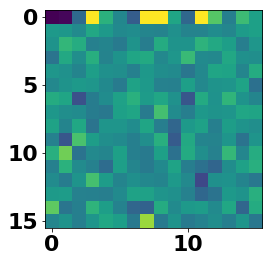

In [62]:
nx = window
ny = 16
cm = .2
plt.imshow(np.reshape(u[:,10], (ny, nx)), aspect='equal', interpolation='none',clim=(-cm, cm))
print(np.shape(x),np.shape(y),np.shape(s))

#plt.colorbar()

In [17]:
print(np.diag(csigns))

[[ 1  0  0  0  0  0]
 [ 0 -1  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0 -1  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0 -1]]


In [63]:
a, h, U, V = mner.util.util.vec_to_weights(x, ndim, rank)
tmp= np.transpose(V)
print(np.shape(U),np.shape(V))
J_real = np.matmul(U,tmp)

((256, 4), ())


TypeError: Object arrays are not currently supported